<a href="https://colab.research.google.com/github/caro-vergara-tamara/where-to-live/blob/main/read_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import geopandas as gpd
import fiona

In [47]:
# read Databases
#import pandas as pd
#pop = pd.read_excel('/content/drive/MyDrive/MFP/Databases_statbel/TF_SOC_POP_STRUCT_2024.xlsx', engine='openpyxl')
#income = pd.read_excel('/content/drive/MyDrive/MFP/Databases_statbel/TF_PSNL_INC_TAX_MUNTY.xlsx', engine='openpyxl')
#pop_sector = pd.read_excel('/content/drive/MyDrive/MFP/Databases_statbel/OPENDATA_SECTOREN_2024.xlsx', engine='openpyxl')

In [46]:
# Import immo database
immo_nis7 = pd.read_excel('data/TF_IMMO_SECTOR_nis_7.xlsx', engine='openpyxl')

immo = pd.read_excel('data/TF_IMMO_SECTOR.xlsx', engine='openpyxl')
immo.columns

Index(['CD_STAT_SECTOR', 'CD_YEAR', 'CD_TYPE', 'CD_TYPE_NL', 'CD_TYPE_FR',
       'MS_TRANSACTIONS', 'MS_P25', 'MS_P50 (MEDIAN_PRICE)', 'MS_P75',
       'MS_P10', 'MS_P90'],
      dtype='object')

In [47]:
immo = immo[['CD_STAT_SECTOR', 'CD_YEAR', 'CD_TYPE', 'CD_TYPE_FR',
       'MS_TRANSACTIONS', 'MS_P25', 'MS_P50 (MEDIAN_PRICE)', 'MS_P75',
       'MS_P10', 'MS_P90']]

In [48]:
immo.rename(columns={
    'CD_STAT_SECTOR': 'cd_stat_sector', 
    'CD_YEAR': 'cd_year', 
    'CD_TYPE': 'cd_type', 
    'MS_TRANSACTIONS': 'n', 
    'MS_P25': 'p25', 
    'MS_P50 (MEDIAN_PRICE)': 'p50', 
    'MS_P75': 'p75',
    'MS_P10': 'p10', 
    'MS_P90': 'p90'
}, inplace=True)

In [49]:
# Add geographical data
geo_data = pd.read_parquet("data/geo_data_2024.parquet")
geo_data.columns
geo_data = geo_data.rename({'cd_sector' : 'cd_stat_sector'}, axis = "columns")
geo_data.columns


Index(['cd_stat_sector', 'cd_sub_munty', 'cd_munty_refnis', 'cd_dstr_refnis',
       'cd_prov_refnis', 'cd_rgn_refnis'],
      dtype='object')

In [51]:
immo['cd_stat_sector'] = immo['cd_stat_sector'].astype(str).str.strip()
geo_data['cd_stat_sector'] = geo_data['cd_stat_sector'].astype(str).str.strip()

In [72]:
# Adding geo information
immo = immo.merge(geo_data, how = "left", on = "cd_stat_sector")
#immo.head()

In [53]:
immo.isnull().sum()          

cd_stat_sector          0
cd_year                 0
cd_type                 0
CD_TYPE_FR              0
n                       0
p25                429771
p50                429771
p75                429771
p10                429771
p90                429771
cd_sub_munty        10034
cd_munty_refnis     10034
cd_dstr_refnis      10034
cd_prov_refnis      27390
cd_rgn_refnis       10034
dtype: int64

In [66]:
mask_missing = immo['cd_sub_munty'].isnull()

# Check if all rows with missing 'cd_sub_munty' have '_UNKNOWN' in 'cd_stat_sector'
all_unknown = immo.loc[mask_missing, 'cd_stat_sector'].str.endswith('_UNKNOWN').all()

print("✅ All missing are _UNKNOWN:", all_unknown)

✅ All missing are _UNKNOWN: False


In [64]:
mask_missing.tail()

456844    True
456845    True
456846    True
456847    True
456848    True
Name: cd_sub_munty, dtype: bool

In [71]:
# Now find the rows where cd_stat_sector does NOT end with "_UNKNOWN"
not_unknown_mask = ~immo.loc[mask_missing, 'cd_stat_sector'].str.endswith('_UNKNOWN')

# Get those rows
suspicious_rows = immo.loc[mask_missing].loc[not_unknown_mask]

# Display the problematic cd_stat_sector values
print(suspicious_rows['cd_stat_sector'].unique())


['11002J81-' '11002J901' '11002J912' '11002J923' '11002J932' '11002J94-'
 '11002P21-' '11002Q2PA' '52043A10-' '52043B01-' '52063A372' '62108F09-'
 '62108F19-']


In [ ]:
##################  ATENTION !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# i THINK THAT FOR EXAMPLE 11002J CAN BE EXTRACTED! AND THEN DO THE MERGE 

In [35]:
# which columns the database has and weather it has many missing values
print(immo.info())

#Number rows and coulumns
print(immo.shape)

# tenemos years del 13 al 23 para cada sector estadistico
#https://statbel.fgov.be/en/search?search_api_fulltext_block=Statistical%20sectors&f%5B0%5D=theme_search%3A1390


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456849 entries, 0 to 456848
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   cd_stat_sector   456849 non-null  object 
 1   cd_year          456849 non-null  int64  
 2   cd_type          456849 non-null  object 
 3   CD_TYPE_FR       456849 non-null  object 
 4   n                456849 non-null  int64  
 5   p25              27078 non-null   float64
 6   p50              27078 non-null   float64
 7   p75              27078 non-null   float64
 8   p10              27078 non-null   float64
 9   p90              27078 non-null   float64
 10  cd_sub_munty     446815 non-null  object 
 11  cd_munty_refnis  446815 non-null  object 
 12  cd_dstr_refnis   446815 non-null  object 
 13  cd_prov_refnis   429459 non-null  object 
 14  cd_rgn_refnis    446815 non-null  object 
dtypes: float64(5), int64(2), object(8)
memory usage: 52.3+ MB
None
(456849, 15)


In [50]:
immo.columns  

Index(['CD_STAT_SECTOR', 'CD_YEAR', 'CD_TYPE', 'CD_TYPE_NL', 'CD_TYPE_FR',
       'MS_TRANSACTIONS', 'MS_P25', 'MS_P50 (MEDIAN_PRICE)', 'MS_P75',
       'MS_P10', 'MS_P90'],
      dtype='object')

In [51]:
immo.dtypes         # Data types of each column

CD_STAT_SECTOR            object
CD_YEAR                    int64
CD_TYPE                   object
CD_TYPE_NL                object
CD_TYPE_FR                object
MS_TRANSACTIONS            int64
MS_P25                   float64
MS_P50 (MEDIAN_PRICE)    float64
MS_P75                   float64
MS_P10                   float64
MS_P90                   float64
dtype: object

In [52]:
immo.head()         # First 5 rows

,CD_STAT_SECTOR,CD_YEAR,CD_TYPE,CD_TYPE_NL,CD_TYPE_FR,MS_TRANSACTIONS,MS_P25,MS_P50 (MEDIAN_PRICE),MS_P75,MS_P10,MS_P90
0,11001A00-,2013,B001,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,17,190000.0,266000.0,320000.0,160000.0,350000.0
1,11001A00-,2014,B001,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,20,197500.0,233750.0,294000.0,170000.0,353750.0
2,11001A00-,2015,B001,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,14,NaN,NaN,NaN,NaN,NaN
3,11001A00-,2016,B001,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,16,NaN,NaN,NaN,NaN,NaN
4,11001A00-,2017,B001,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,20,240000.0,305600.0,339000.0,168500.0,462000.0


In [36]:
immo.isnull().sum()                # Count missing values per column

cd_stat_sector          0
cd_year                 0
cd_type                 0
CD_TYPE_FR              0
n                       0
p25                429771
p50                429771
p75                429771
p10                429771
p90                429771
cd_sub_munty        10034
cd_munty_refnis     10034
cd_dstr_refnis      10034
cd_prov_refnis      27390
cd_rgn_refnis       10034
dtype: int64

In [59]:
# I want to check if there's a particular year that has more missing information than other, 
immo.groupby("cd_year").apply(lambda x: x.isnull().sum())

C:\Users\carol\AppData\Local\Temp\ipykernel_18172\3826317172.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  immo.groupby("cd_year").apply(lambda x: x.isnull().sum())


,cd_stat_sector,cd_year,cd_type,CD_TYPE_FR,n,p25,p50,p75,p10,p90
cd_year,,,,,,,,,,
2013,0,0,0,0,0,37355,37355,37355,37355,37355
2014,0,0,0,0,0,38534,38534,38534,38534,38534
2015,0,0,0,0,0,38164,38164,38164,38164,38164
2016,0,0,0,0,0,38628,38628,38628,38628,38628
2017,0,0,0,0,0,38933,38933,38933,38933,38933
2018,0,0,0,0,0,39681,39681,39681,39681,39681
2019,0,0,0,0,0,39499,39499,39499,39499,39499
2020,0,0,0,0,0,39493,39493,39493,39493,39493
2021,0,0,0,0,0,39901,39901,39901,39901,39901


In [60]:
immo['CD_TYPE_FR'].unique()

array(['Maisons avec 2 ou 3 façades (type fermé + type demi-fermé)',
       'Maisons avec 4 ou plus de façades (type ouvert)',
       'Toutes les maisons avec 2, 3, 4 ou plus de façades (excl. appartements)',
       'Appartements'], dtype=object)

In [61]:
immo['cd_type'].unique()

array(['B001', 'B002', 'B00A', 'B015'], dtype=object)

In [62]:
immo.groupby('cd_type')["CD_TYPE_FR"].unique()

cd_type
B001    [Maisons avec 2 ou 3 façades (type fermé + typ...
B002    [Maisons avec 4 ou plus de façades (type ouvert)]
B00A    [Toutes les maisons avec 2, 3, 4 ou plus de fa...
B015                                       [Appartements]
Name: CD_TYPE_FR, dtype: object

In [63]:
df = immo.groupby(['cd_type', "cd_year"])["p50"].mean().reset_index()

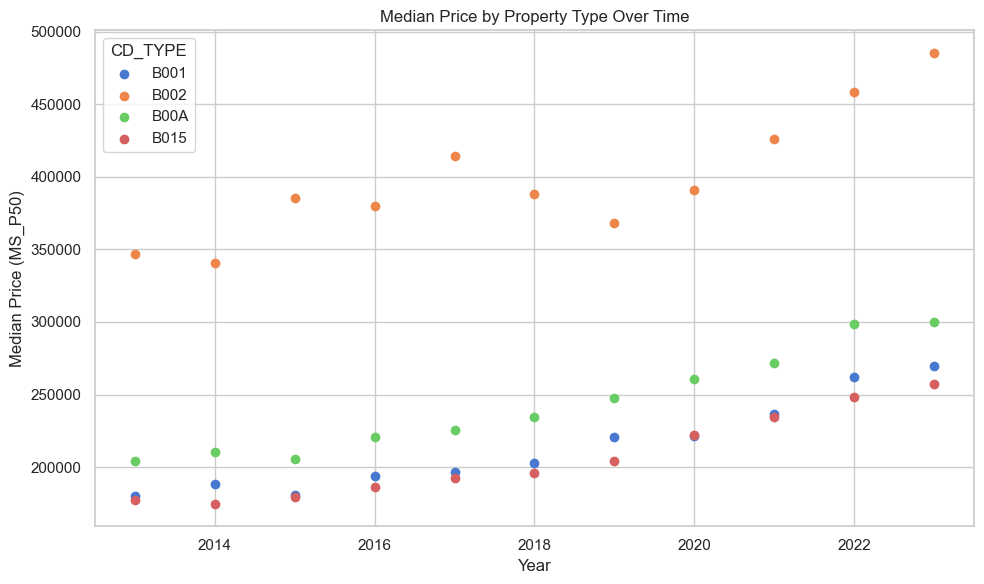

In [64]:
import matplotlib.pyplot as plt

# Assuming df is your grouped DataFrame with CD_TYPE, CD_YEAR, and MS_P50
plt.figure(figsize=(10, 6))

for cd_type, group in df.groupby('cd_type'):
    plt.scatter(group['cd_year'], group['p50'], label=cd_type)

plt.xlabel("Year")
plt.ylabel("Median Price (MS_P50)")
plt.title("Median Price by Property Type Over Time")
plt.legend(title="CD_TYPE")
plt.grid(True)
plt.tight_layout()
plt.show()


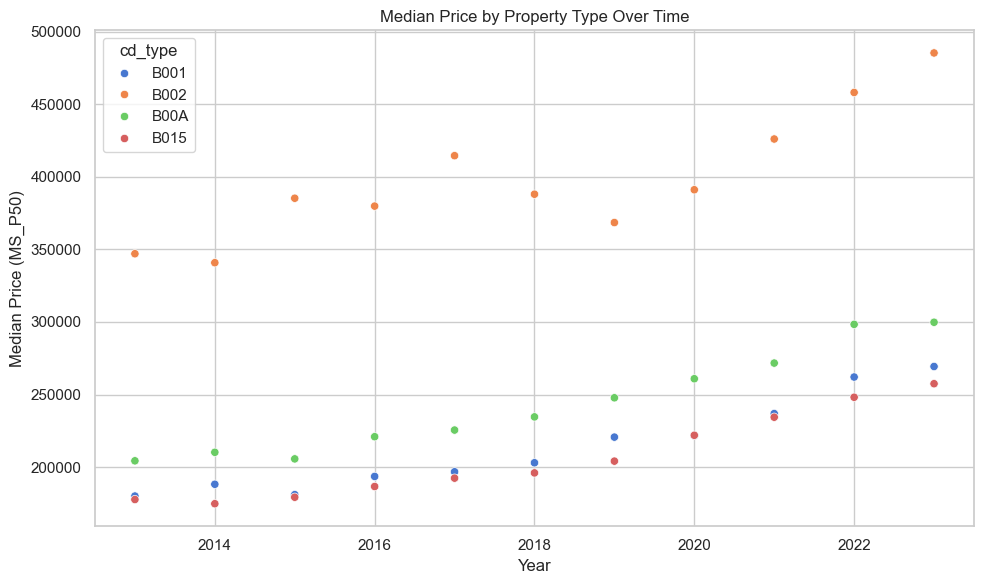

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid", palette="muted")
sns.scatterplot(data=df, x='cd_year', y='p50', hue='cd_type')

plt.xlabel("Year")
plt.ylabel("Median Price (MS_P50)")
plt.title("Median Price by Property Type Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()


In [66]:
df["source"] = "original"

In [79]:
import numpy as np
import pandas as pd

def expand_to_synthetic_transactions(df):
    """
    Given a DataFrame with quantiles and number of transactions per group (e.g. region-year-type),
    generates a synthetic transaction-level dataset.

    Required columns in df:
        - 'cd_stat_sector', 'cd_year', 'cd_type'
        - 'p10', 'p25', 'p50', 'p75', 'p90', 'n'

    Returns:
        A DataFrame of synthetic prices with metadata and a 'source' column.
    """

    def generate_synthetic_prices(p10, p25, p50, p75, p90, n):
        quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
        values = [p10, p25, p50, p75, p90]
        probs = np.random.uniform(0.1, 0.9, size=n)
        return np.interp(probs, quantiles, values)

    # Drop rows with missing data
    df_clean = df.dropna(subset=['p10', 'p25', 'p50', 'p75', 'p90', 'n'])

    synthetic_rows = []

    for _, row in df_clean.iterrows():
        prices = generate_synthetic_prices(
            p10=row['p10'], p25=row['p25'], p50=row['p50'],
            p75=row['p75'], p90=row['p90'], n=int(row['n'])
        )
        for price in prices:
            synthetic_rows.append({
                'cd_stat_sector': row['cd_stat_sector'],
                'cd_year': row['cd_year'],
                'cd_type': row['cd_type'],
                'price': price,
                'source': 'synthetic'
            })

    return pd.DataFrame(synthetic_rows)


In [80]:
synthetic_df = expand_to_synthetic_transactions(immo)

In [81]:
synthetic_df.sample(6)

,cd_stat_sector,cd_year,cd_type,price,source
527422,44021E042,2021,B00A,332653.644501,synthetic
570780,46021A101,2022,B00A,309891.913477,synthetic
419611,35029C00-,2018,B015,99815.660458,synthetic
467749,41048A01-,2016,B00A,172283.060565,synthetic
29718,11002L100,2018,B00A,346477.174188,synthetic
647058,62063A31-,2023,B015,119890.863370,synthetic


In [88]:
db = synthetic_df

In [91]:
db.head()
db = db.rename({"cd_stat_sector": "cd_sector"}, axis='columns')
immo_nis9 = gdf_2024.merge(db, how="left", on="cd_sector")


,cd_stat_sector,cd_year,cd_type,price,source
0,11001A00-,2013,B001,213437.340204,synthetic
1,11001A00-,2013,B001,262281.182510,synthetic
2,11001A00-,2013,B001,208228.076455,synthetic
3,11001A00-,2013,B001,203749.469641,synthetic
4,11001A00-,2013,B001,190353.158081,synthetic


In [89]:
cleaned_db = db.dropna()
db = db.rename({"CD_STAT_SECTOR": "cd_sector"}, axis='columns')



In [6]:
immo_2023 = immo[(immo['CD_YEAR'] == 2023) & (immo['CD_TYPE'] == 'B00A')]
immo_2023.head()

cleaned_immo_2023 = immo_2023.dropna()
cleaned_immo_2023.head()
unique_values = cleaned_immo_2023['CD_STAT_SECTOR'].unique()
unique_values
len(pd.unique(cleaned_immo_2023['CD_STAT_SECTOR']))

939

In [ ]:
immo_2023

,CD_STAT_SECTOR,CD_YEAR,CD_TYPE,CD_TYPE_NL,CD_TYPE_FR,MS_TRANSACTIONS,MS_P25,MS_P50 (MEDIAN_PRICE),MS_P75,MS_P10,MS_P90
27,11001A00-,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",12,NaN,NaN,NaN,NaN,NaN
71,11001A01-,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",33,347000.0,422000.0,580000.0,296500.0,680000.0
115,11001A020,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",9,NaN,NaN,NaN,NaN,NaN
148,11001A030,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",4,NaN,NaN,NaN,NaN,NaN
181,11001A042,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
456721,93090G032,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",3,NaN,NaN,NaN,NaN,NaN
456735,93090G043,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",2,NaN,NaN,NaN,NaN,NaN
456762,93090G091,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",1,NaN,NaN,NaN,NaN,NaN
456787,93090G191,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",1,NaN,NaN,NaN,NaN,NaN


In [ ]:
immo_2023 = immo_2023.rename({"CD_STAT_SECTOR": "cd_sector"}, axis='columns')
immo_2023.head()

,cd_sector,CD_YEAR,CD_TYPE,CD_TYPE_NL,CD_TYPE_FR,MS_TRANSACTIONS,MS_P25,MS_P50 (MEDIAN_PRICE),MS_P75,MS_P10,MS_P90
27,11001A00-,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",12,NaN,NaN,NaN,NaN,NaN
71,11001A01-,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",33,347000.0,422000.0,580000.0,296500.0,680000.0
115,11001A020,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",9,NaN,NaN,NaN,NaN,NaN
148,11001A030,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",4,NaN,NaN,NaN,NaN,NaN
181,11001A042,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",5,NaN,NaN,NaN,NaN,NaN


<Axes: >

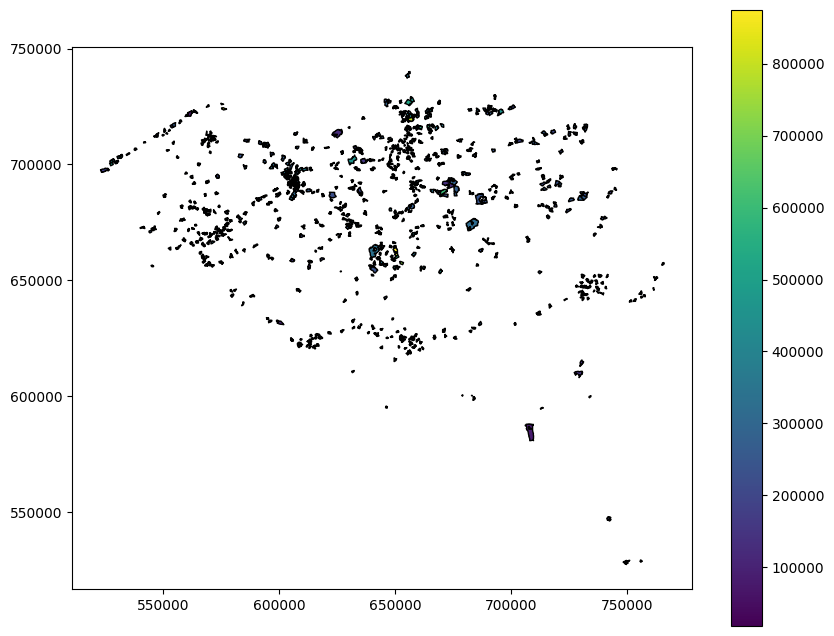

In [ ]:
immo_nis9 = gdf_2024.merge(immo_2023, how="left", on="cd_sector")


# Simple choropleth plot
immo_nis9.plot(column="MS_P25",
         cmap="viridis",
         legend=True,
         figsize=(10, 8),
         edgecolor="black")

In [ ]:
immo_nis7 = immo_nis7[(immo_nis7['CD_YEAR'] == 2023) & (immo_nis7['CD_TYPE'] == 'B00A')]
immo_nis7.head()


,CD_WIJK_QUARTIER,CD_YEAR,CD_TYPE,CD_TYPE_NL,CD_TYPE_FR,MS_TRANSACTIONS,MS_P25,MS_P50 (MEDIAN_PRICE),MS_P75
32,11001A0,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",96,355000.0,417400.0,555000.0
76,11001A1,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",16,331250.0,387500.0,445000.0
119,11001A2,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",28,339500.0,392250.0,497500.0
171,11002A0,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",11,NaN,NaN,NaN
204,11002A1,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",23,322500.0,444500.0,565000.0


In [ ]:
# Cleaned Database at NIS7
cleaned_immo_nis7 = immo_nis7.dropna()
cleaned_immo_nis7.head()
unique_values = cleaned_immo_nis7['CD_WIJK_QUARTIER'].unique()
unique_values
len(pd.unique(cleaned_immo_nis7['CD_WIJK_QUARTIER']))


1673

In [ ]:
immo_nis7.head()

,CD_WIJK_QUARTIER,CD_YEAR,CD_TYPE,CD_TYPE_NL,CD_TYPE_FR,MS_TRANSACTIONS,MS_P25,MS_P50 (MEDIAN_PRICE),MS_P75
32,11001A0,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",96,355000.0,417400.0,555000.0
76,11001A1,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",16,331250.0,387500.0,445000.0
119,11001A2,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",28,339500.0,392250.0,497500.0
171,11002A0,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",11,NaN,NaN,NaN
204,11002A1,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",23,322500.0,444500.0,565000.0


In [ ]:
brussels_zones = ["BRUXELLES PENTAGONE",
                  "BRUXELLES-CHAUSSEE D'ANVERS",
                  "BRUXELLES-HAREN",
                  "BRUXELLES-LAEKEN",
                  "BRUXELLES-LOUISE",
                  "BRUXELLES-NEDER-OVERHEEMBEEK",
                  "BRUXELLES-RUE DE LA LOI"
                  ]

filtered = gdf_2024[gdf_2024["tx_sub_munty_fr"].isin(brussels_zones)]
filtered



,ogc_fid0,cd_sector,tx_sector_descr_nl,tx_sector_descr_fr,tx_sector_descr_de,cd_sub_munty,tx_sub_munty_nl,tx_sub_munty_fr,tx_munty_dstr,cd_munty_refnis,...,tx_rgn_descr_fr,tx_rgn_descr_de,cd_country,cd_nuts_lvl1,cd_nuts_lvl2,cd_nuts_lvl3,ms_area_ha,ms_perimeter_m,dt_situation,geometry
2130,2131,21004A001,GROTE MARKT,GRAND-PLACE,GRAND-PLACE,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,10.775006,1421.0,2024-01-01,"MULTIPOLYGON (((648991.628 670692.468, 649015...."
2131,2132,21004A002,BEURS,BOURSE,BOURSE,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,3.951623,877.0,2024-01-01,"MULTIPOLYGON (((648801.873 670883.21, 648751.8..."
2132,2133,21004A01-,OUD KORENHUIS,VIEILLE HALLE AUX BLES,VIEILLE HALLE AUX BLES,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,9.002431,1252.0,2024-01-01,"MULTIPOLYGON (((648996.436 670340.831, 648966...."
2133,2134,21004A02-,SINT-FRANCISCUS XAVERIUS,SAINT-FRANCOIS XAVIER,SAINT-FRANCOIS XAVIER,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,13.650586,2097.0,2024-01-01,"MULTIPOLYGON (((648808.561 670221.841, 648730...."
2134,2135,21004A03-,BIJSTAND - ZUID PALEIS,BON SECOURS - PALAIS DU MIDI,BON SECOURS - PALAIS DU MIDI,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,10.525579,2187.0,2024-01-01,"MULTIPOLYGON (((648652.857 670630.631, 648600...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,2233,21004G310,HAREN-ZUIDWEST,HAREN-SUD-OUEST,HAREN-SUD-OUEST,21004G,BRUSSEL-HAREN,BRUXELLES-HAREN,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,30.772596,3864.0,2024-01-01,"MULTIPOLYGON (((653621.794 675417.81, 653580.2..."
2233,2234,21004G321,HAREN-OOST,HAREN-EST,HAREN-EST,21004G,BRUSSEL-HAREN,BRUXELLES-HAREN,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,29.513899,2353.0,2024-01-01,"MULTIPOLYGON (((654321.725 675145.835, 654304...."
2234,2235,21004G371,VORMINGSSTATION,GARE DE FORMATION,GARE DE FORMATION,21004G,BRUSSEL-HAREN,BRUXELLES-HAREN,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,207.856227,8011.0,2024-01-01,"MULTIPOLYGON (((653302.2 677311.682, 653302.93..."
2235,2236,21004G3MJ,DOBBELENBERG,DOBBELENBERG,DOBBELENBERG,21004G,BRUSSEL-HAREN,BRUXELLES-HAREN,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,65.919884,5423.0,2024-01-01,"MULTIPOLYGON (((653908.417 676849.688, 653913...."


In [ ]:
filtered = gdf_2024[gdf_2024["cd_munty_refnis"]== '21004'] # same same
filtered


,ogc_fid0,cd_sector,tx_sector_descr_nl,tx_sector_descr_fr,tx_sector_descr_de,cd_sub_munty,tx_sub_munty_nl,tx_sub_munty_fr,tx_munty_dstr,cd_munty_refnis,...,tx_rgn_descr_fr,tx_rgn_descr_de,cd_country,cd_nuts_lvl1,cd_nuts_lvl2,cd_nuts_lvl3,ms_area_ha,ms_perimeter_m,dt_situation,geometry
2130,2131,21004A001,GROTE MARKT,GRAND-PLACE,GRAND-PLACE,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,10.775006,1421.0,2024-01-01,"MULTIPOLYGON (((648991.628 670692.468, 649015...."
2131,2132,21004A002,BEURS,BOURSE,BOURSE,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,3.951623,877.0,2024-01-01,"MULTIPOLYGON (((648801.873 670883.21, 648751.8..."
2132,2133,21004A01-,OUD KORENHUIS,VIEILLE HALLE AUX BLES,VIEILLE HALLE AUX BLES,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,9.002431,1252.0,2024-01-01,"MULTIPOLYGON (((648996.436 670340.831, 648966...."
2133,2134,21004A02-,SINT-FRANCISCUS XAVERIUS,SAINT-FRANCOIS XAVIER,SAINT-FRANCOIS XAVIER,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,13.650586,2097.0,2024-01-01,"MULTIPOLYGON (((648808.561 670221.841, 648730...."
2134,2135,21004A03-,BIJSTAND - ZUID PALEIS,BON SECOURS - PALAIS DU MIDI,BON SECOURS - PALAIS DU MIDI,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,10.525579,2187.0,2024-01-01,"MULTIPOLYGON (((648652.857 670630.631, 648600...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,2233,21004G310,HAREN-ZUIDWEST,HAREN-SUD-OUEST,HAREN-SUD-OUEST,21004G,BRUSSEL-HAREN,BRUXELLES-HAREN,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,30.772596,3864.0,2024-01-01,"MULTIPOLYGON (((653621.794 675417.81, 653580.2..."
2233,2234,21004G321,HAREN-OOST,HAREN-EST,HAREN-EST,21004G,BRUSSEL-HAREN,BRUXELLES-HAREN,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,29.513899,2353.0,2024-01-01,"MULTIPOLYGON (((654321.725 675145.835, 654304...."
2234,2235,21004G371,VORMINGSSTATION,GARE DE FORMATION,GARE DE FORMATION,21004G,BRUSSEL-HAREN,BRUXELLES-HAREN,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,207.856227,8011.0,2024-01-01,"MULTIPOLYGON (((653302.2 677311.682, 653302.93..."
2235,2236,21004G3MJ,DOBBELENBERG,DOBBELENBERG,DOBBELENBERG,21004G,BRUSSEL-HAREN,BRUXELLES-HAREN,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,65.919884,5423.0,2024-01-01,"MULTIPOLYGON (((653908.417 676849.688, 653913...."


In [ ]:
gdf_2024["test"] = gdf_2024["cd_munty_refnis"].str[:4]

gdf_2024[gdf_2024["test"] == "2100"]


,ogc_fid0,cd_sector,tx_sector_descr_nl,tx_sector_descr_fr,tx_sector_descr_de,cd_sub_munty,tx_sub_munty_nl,tx_sub_munty_fr,tx_munty_dstr,cd_munty_refnis,...,tx_rgn_descr_de,cd_country,cd_nuts_lvl1,cd_nuts_lvl2,cd_nuts_lvl3,ms_area_ha,ms_perimeter_m,dt_situation,geometry,test
1997,1998,21001A00-,VERZET,RESISTANCE,RESISTANCE,21001A,ANDERLECHT-CENTRUM,ANDERLECHT-CENTRE,None,21001,...,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,12.514422,1730.0,2024-01-01,"MULTIPOLYGON (((646124.965 669525.05, 646121.8...",2100
1998,1999,21001A011,KLEINMOLEN,KLEINMOLEN,KLEINMOLEN,21001A,ANDERLECHT-CENTRUM,ANDERLECHT-CENTRE,None,21001,...,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,17.884033,1952.0,2024-01-01,"MULTIPOLYGON (((646420.588 669763.826, 646471....",2100
1999,2000,21001A02-,WAYEZ,WAYEZ,WAYEZ,21001A,ANDERLECHT-CENTRUM,ANDERLECHT-CENTRE,None,21001,...,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,3.875365,1680.0,2024-01-01,"MULTIPOLYGON (((646389.25 669587.589, 646389.2...",2100
2000,2001,21001A031,RAUTER-ZUID,RAUTER-SUD,RAUTER-SUD,21001A,ANDERLECHT-CENTRUM,ANDERLECHT-CENTRE,None,21001,...,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,10.893589,1539.0,2024-01-01,"MULTIPOLYGON (((645888.307 669013.456, 645848....",2100
2001,2002,21001A041,VEEWEIDE-ZUID,VEEWEYDE-SUD,VEEWEYDE-SUD,21001A,ANDERLECHT-CENTRUM,ANDERLECHT-CENTRE,None,21001,...,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,15.746192,1693.0,2024-01-01,"MULTIPOLYGON (((645327.682 669178.466, 645331....",2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,2391,21009A82-,WOUD,FORET,FORET,21009A,ELSENE,IXELLES,None,21009,...,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,14.276074,1625.0,2024-01-01,"MULTIPOLYGON (((651840.045 665959.455, 651716....",2100
2391,2392,21009A83-,L. ERNOTTESTRAAT,L. ERNOTTE (RUE),L. ERNOTTE (RUE),21009A,ELSENE,IXELLES,None,21009,...,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,9.727913,1924.0,2024-01-01,"MULTIPOLYGON (((652013.862 666259.483, 652013....",2100
2392,2393,21009A90-,SINT-FILIPPUS,SAINT-PHILIPPE DE NERI,SAINT-PHILIPPE DE NERI,21009A,ELSENE,IXELLES,None,21009,...,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,13.787527,1603.0,2024-01-01,"MULTIPOLYGON (((650882.566 668073.074, 650890....",2100
2393,2394,21009A911,A. DELPORTE-ZUID,A. DELPORTE-SUD,A. DELPORTE-SUD,21009A,ELSENE,IXELLES,None,21009,...,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,7.887527,1375.0,2024-01-01,"MULTIPOLYGON (((651245.902 667853.744, 651215....",2100


In [ ]:
# Add hierarchy levels
immo_nis7['L0'] = immo_nis7['CD_WIJK_QUARTIER'].str[:4]   # e.g. 1100
immo_nis7['L1'] = immo_nis7['CD_WIJK_QUARTIER'].str[:5]   # e.g. 11001
immo_nis7['L2'] = immo_nis7['CD_WIJK_QUARTIER'].str[:6]   # e.g. 11001A
immo_nis7['L3'] = immo_nis7['CD_WIJK_QUARTIER'].str[:7]   # e.g. 11001A0
#immo_nis7['L4'] = immo_nis7['CD_WIJK_QUARTIER'].str[:8]   # e.g. 11001A00

immo_nis7.columns = immo_nis7.columns.str.strip()  # Remove accidental spaces
immo_nis7 = immo_nis7.rename({"MS_P50 (MEDIAN_PRICE)": "MS_P50"}, axis='columns')

immo_nis7.head()


# Apply to MS_P50, MS_P25, and MS_P75
#for col in ['MS_P50', 'MS_P25', 'MS_P75']:
#    immo_nis7[col] = pd.to_numeric(immo_nis7[col], errors='coerce')  # Ensure numeric
#    immo_nis7 = fill_hierarchy(immo_nis7, col)

,CD_WIJK_QUARTIER,CD_YEAR,CD_TYPE,CD_TYPE_NL,CD_TYPE_FR,MS_TRANSACTIONS,MS_P25,MS_P50,MS_P75,L0,L1,L2,L3
32,11001A0,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",96,355000.0,417400.0,555000.0,1100,11001,11001A,11001A0
76,11001A1,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",16,331250.0,387500.0,445000.0,1100,11001,11001A,11001A1
119,11001A2,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",28,339500.0,392250.0,497500.0,1100,11001,11001A,11001A2
171,11002A0,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",11,NaN,NaN,NaN,1100,11002,11002A,11002A0
204,11002A1,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",23,322500.0,444500.0,565000.0,1100,11002,11002A,11002A1


In [ ]:
# Function to fill missing MS_P50 by hierarchy
def fill_hierarchy(df, target_col):
    df_copy = df.copy()

    # and the idea is that we go from:
    # more granular to more wide and replacing the m
    for level in ['L3', 'L2', 'L1', 'L0' ]:
        # Compute group mean at that level
        group_mean = df_copy.groupby(level)[target_col].transform('mean')
        # Fill only where value is NaN
        df_copy[target_col] = df_copy[target_col].fillna(group_mean)
    return df_copy


immo_nis7_bis = fill_hierarchy(immo_nis7, 'MS_P50')

In [ ]:
immo_nis7_bis.head()

,CD_WIJK_QUARTIER,CD_YEAR,CD_TYPE,CD_TYPE_NL,CD_TYPE_FR,MS_TRANSACTIONS,MS_P25,MS_P50,MS_P75,L0,L1,L2,L3
32,11001A0,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",96,355000.0,417400.0,555000.0,1100,11001,11001A,11001A0
76,11001A1,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",16,331250.0,387500.0,445000.0,1100,11001,11001A,11001A1
119,11001A2,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",28,339500.0,392250.0,497500.0,1100,11001,11001A,11001A2
171,11002A0,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",11,NaN,444500.0,NaN,1100,11002,11002A,11002A0
204,11002A1,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",23,322500.0,444500.0,565000.0,1100,11002,11002A,11002A1


In [ ]:
#gdf_2024['L3'] = gdf_2024['cd_sector'].str[:7]
#gdf_2024.head()


In [ ]:
immo_nis7 = gdf_2024.merge(immo_nis7_bis, how="left", on="L3")


# Simple choropleth plot
immo_nis7.plot(column="MS_P50",
               cmap="viridis",
               legend=True,
               figsize=(10, 8),
               #edgecolor="black",
               vmin=150000,  # Lower bound of color scale
               vmax=800000   # Upper bound of color scale
               )


KeyError: 'L3'

In [ ]:
immo_nis7_bis["MS_P50"].mean()


np.float64(288269.5089632581)

In [ ]:
gdf = immo_nis7

# Identify columns with Timestamp objects
for col in gdf.columns:
    if gdf[col].apply(lambda x: isinstance(x, pd.Timestamp)).any():
        print(f"{col} contains timestamps")


gdf_clean = gdf.drop(columns=["dt_situation"])


dt_situation contains timestamps


In [ ]:
#import folium
#from folium import Choropleth
#
#
## Center map on average coordinates
#center = [gdf_clean.geometry.centroid.y.mean(), gdf_clean.geometry.centroid.x.mean()]
#
## Create map
#m = folium.Map(location=center, zoom_start=10, tiles="cartodbpositron")
#
## Add choropleth
#Choropleth(
#    geo_data=gdf_clean,
#    data=gdf_clean,
#    columns=["cd_sector", "MS_P50"],
#    key_on="feature.properties.cd_sector",
#    fill_color="YlOrRd",
#    fill_opacity=0.7,
#    line_opacity=0.2,
#    legend_name="Median Price (€)"
#).add_to(m)
#
## Display
#m

In [ ]:

# select the year 2022
income.loc[income['CD_YEAR'] ==2022]

income_clean = (
    income[income['CD_YEAR'] == 2022]  # filter
    .rename(columns={
        'CD_YEAR': 'year',
        'MS_NBR_NON_ZERO_INC': 'n_non_zero_inc', #Nombre de déclarations !zero
        'MS_NBR_ZERO_INC': 'n_zero_inc', #Nombre de déclarations zero
        'MS_TOT_NET_TAXABLE_INC': 'revenue_total_imposable',

        'MS_TOT_NET_INC': 'revenue_total_net',
        'MS_NBR_TOT_NET_INC': 'n_revenue_total_net',

        'MS_REAL_ESTATE_NET_INC': 'revenue_real_estate_net',
        'MS_NBR_REAL_ESTATE_NET_INC': 'n_revenue_real_estate_net',

        'MS_TOT_NET_VARIOUS_INC': 'revenue_various_net',
        'MS_NBR_NET_VARIOUS_INC': 'n_revenue_various_net',

        'MS_TOT_NET_PROF_INC': 'revenue_prof_net',
        'MS_NBR_NET_PROF_INC' :  'n_revenue_prof_net',

        'MS_JOINT_TAXABLE_INC' : 'revenue_joint_imposable',
        'MS_NBR_JOINT_TAXABLE_INC' : 'n_revenue_joint_imposable',

        'MS_TOT_MUNICIP_TAXES' : 'revenue_municip_taxes', # commune
        'MS_NBR_MUNICIP_TAXES' : 'n_revenue_municip_taxes',

        'MS_TOT_SUBURBS_TAXES' : 'revenue_suburbs_taxes', # agglomération
        'MS_NBR_SUBURBS_TAXES' : 'n_revenue_suburbs_taxes',

        'MS_TOT_RESIDENTS' : 'n', # résidentiel
        'MS_NBR_TOT_TAXES' : 'n_tot_taxes',

        'MS_TOT_TAXES' : 'revenue_total_taxes',
        'CD_MUNTY_REFNIS' : 'cd_munty_refnis'
    })  # rename
    [['cd_munty_refnis','n_non_zero_inc', 'n_zero_inc', 'revenue_total_imposable',
      'revenue_total_net', 'n_revenue_total_net',
      'revenue_real_estate_net', 'n_revenue_real_estate_net',
      'revenue_various_net', 'n_revenue_various_net',
      'revenue_prof_net', 'n_revenue_prof_net',
      'revenue_joint_imposable', 'n_revenue_joint_imposable',
      'revenue_municip_taxes', 'n_revenue_municip_taxes',
      'revenue_suburbs_taxes', 'n_revenue_suburbs_taxes',
      'n', 'n_tot_taxes', 'revenue_total_taxes' ]]  # select
)

In [ ]:
income_clean.sort_values(by='revenue_total_net', ascending=False).head()

# just for info in how to do it
income_clean.sort_values(['revenue_total_net', 'cd_munty_refnis'], ascending=[False, False]).head()

# How to subset columns:
income_clean[['cd_munty_refnis', 'revenue_total_net']]

columns_sub = ['cd_munty_refnis','n_revenue_total_net',  'revenue_total_net']
income_clean[columns_sub].sort_values(['revenue_total_net'], ascending=[False]).head()

# Filtering rows based on values
income_clean[income_clean['n_revenue_total_net']>200000]

n_net = income_clean['n_revenue_total_net']>150000
n_pof = income_clean['n_revenue_prof_net']>50000
income_clean[n_net & n_pof]



#Datacamp---
## Filter for rows where family_members is less than 1000
# and region is Pacific
#fam_lt_1k_pac = homelessness[(homelessness['family_members']<1000) & (homelessness['region']=='Pacific')]

# See the result
#print(fam_lt_1k_pac)

# The Mojave Desert states
#canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
#mojave_homelessness = homelessness[homelessness['state'].isin(canu)]

# See the result
#print(mojave_homelessness)



,cd_munty_refnis,n_non_zero_inc,n_zero_inc,revenue_total_imposable,revenue_total_net,n_revenue_total_net,revenue_real_estate_net,n_revenue_real_estate_net,revenue_various_net,n_revenue_various_net,...,n_revenue_prof_net,revenue_joint_imposable,n_revenue_joint_imposable,revenue_municip_taxes,n_revenue_municip_taxes,revenue_suburbs_taxes,n_revenue_suburbs_taxes,n,n_tot_taxes,revenue_total_taxes
35,11002,309571,26327,1.026044e+10,1.028879e+10,309571,122096694.86,36514,15708076.69,5416,...,308201,9.879199e+09,309470,1.728349e+08,226590,0,0,538910,265342,2.308716e+09
4949,44021,163416,12176,6.001643e+09,6.013388e+09,163416,69947987.13,21111,8466319.6,3385,...,162797,5.785228e+09,163378,9.143485e+07,126052,0,0,268122,141025,1.498469e+09


In [ ]:
# HERE!!!

['CD_YEAR',
 'CD_MUNTY_REFNIS',
 'MS_NBR_NON_ZERO_INC',
 'MS_NBR_ZERO_INC',
 'MS_TOT_NET_TAXABLE_INC',
 'MS_TOT_NET_INC',
 'MS_NBR_TOT_NET_INC',
 'MS_REAL_ESTATE_NET_INC',
 'MS_NBR_REAL_ESTATE_NET_INC',
 'MS_TOT_NET_MOV_ASS_INC',
 'MS_NBR_NET_MOV_ASS_INC',
 'MS_TOT_NET_VARIOUS_INC',
 'MS_NBR_NET_VARIOUS_INC',
 'MS_TOT_NET_PROF_INC',
 'MS_NBR_NET_PROF_INC',
 'MS_SEP_TAXABLE_INC',
 'MS_NBR_SEP_TAXABLE_INC',
 'MS_JOINT_TAXABLE_INC',
 'MS_NBR_JOINT_TAXABLE_INC',
 'MS_TOT_DEDUCT_SPEND',
 'MS_NBR_DEDUCT_SPEND',
 'MS_TOT_STATE_TAXES',
 'MS_NBR_STATE_TAXES',
 'MS_TOT_MUNICIP_TAXES',
 'MS_NBR_MUNICIP_TAXES',
 'MS_TOT_SUBURBS_TAXES',
 'MS_NBR_SUBURBS_TAXES',
 'MS_TOT_TAXES',
 'MS_NBR_TOT_TAXES',
 'MS_TOT_RESIDENTS',
 'TX_MUNTY_DESCR_NL',
 'TX_MUNTY_DESCR_FR',
 'TX_MUNTY_DESCR_EN',
 'TX_MUNTY_DESCR_DE',
 'CD_DSTR_REFNIS',
 'TX_DSTR_DESCR_NL',
 'TX_DSTR_DESCR_FR',
 'TX_DSTR_DESCR_EN',
 'TX_DSTR_DESCR_DE',
 'CD_PROV_REFNIS',
 'TX_PROV_DESCR_NL',
 'TX_PROV_DESCR_FR',
 'TX_PROV_DESCR_EN',
 'TX_PROV_D

In [ ]:
pop.columns.tolist()
a = pop['CD_REFNIS'].unique()
a

NameError: name 'pop' is not defined

In [ ]:
pop_sector.columns.tolist()
a = pop_sector['CD_REFNIS'].unique()
a


array([11001, 11002, 11004, 11005, 11007, 11008, 11009, 11013, 11016,
       11018, 11021, 11022, 11023, 11024, 11025, 11029, 11030, 11035,
       11037, 11038, 11039, 11040, 11044, 11050, 11052, 11053, 11054,
       11055, 11056, 11057, 12002, 12005, 12007, 12009, 12014, 12021,
       12025, 12026, 12029, 12035, 12040, 12041, 13001, 13002, 13003,
       13004, 13006, 13008, 13010, 13011, 13012, 13013, 13014, 13016,
       13017, 13019, 13021, 13023, 13025, 13029, 13031, 13035, 13036,
       13037, 13040, 13044, 13046, 13049, 13053, 21001, 21002, 21003,
       21004, 21005, 21006, 21007, 21008, 21009, 21010, 21011, 21012,
       21013, 21014, 21015, 21016, 21017, 21018, 21019, 23002, 23003,
       23009, 23016, 23023, 23024, 23025, 23027, 23032, 23033, 23038,
       23039, 23044, 23045, 23047, 23050, 23052, 23060, 23062, 23064,
       23077, 23081, 23086, 23088, 23094, 23096, 23097, 23098, 23099,
       23100, 23101, 23102, 23103, 23104, 23105, 24001, 24007, 24008,
       24009, 24011,

In [ ]:
b = pop_sector['CD_SECTOR'].unique() #CD_STAT_SECTOR
b

array(['11001A00-', '11001A01-', '11001A020', ..., '93090H063',
       '93090H091', '93090ZZZZ'], dtype=object)

In [ ]:
immo.columns.tolist()
a = immo['CD_STAT_SECTOR'].unique()
a

When you left 2 days ago, you worked on Transforming DataFrames, chapter 1 of the course Data Manipulation with pandas. Here is what you covered in your last lesson:

You learned about adding new columns to a DataFrame in pandas, an essential skill for data manipulation and feature engineering. This process allows you to enrich your data based on existing columns or calculations. Here are the key points:

Creating New Columns: You discovered how to create new columns in a DataFrame by performing operations on existing columns. For example, to convert a dog's height from centimeters to meters, you would use



```
 DataFrame["new_column"] = DataFrame["existing_column"] / 100.
```



Calculating BMI for Dogs: You applied this concept to calculate the Body Mass Index (BMI) for dogs, using the formula BMI = weight_kg / (height_m)^2. This involved creating a new column where each entry is derived from two existing columns.

Combining Skills: You combined various pandas skills to identify tall, skinny dogs. This involved subsetting rows based on BMI, sorting by height, and selecting specific columns to view the result.

Real-world Application: You practiced these skills with a real dataset by adding a column to track the total number of homeless individuals and families, and another to calculate the proportion of homeless individuals per state. The code snippet below illustrates how to add these columns:

```
# Add total col as sum of individuals and family_members
homelessness["total"] = homelessness["individuals"] + homelessness["family_members"]

# Add p_individuals col as proportion of total that are individuals
homelessness["p_individuals"] = homelessness["individuals"] / homelessness["total"]
```
Advanced Manipulation: Finally, you learned to combine data manipulation techniques to answer complex questions, such as identifying states with a high number of homeless individuals per capita.
This lesson equipped you with the ability to transform and enrich data in pandas, laying the groundwork for more advanced data analysis tasks.

The goal of the next lesson is to introduce techniques for deeper data analysis, building on understanding summary statistics and aggregation methods in pandas.

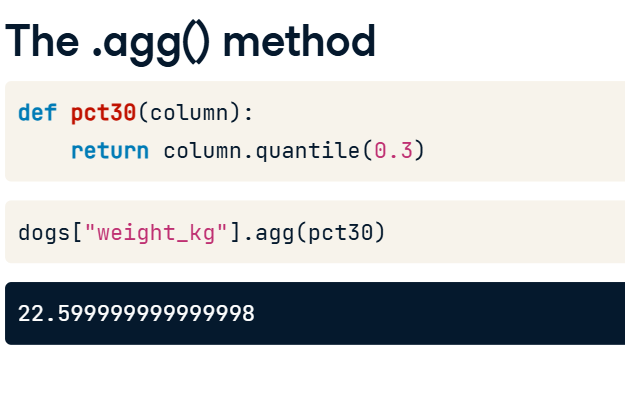

```
def q20(col)
  
```

